In [2]:
import pandas as pd
import os

In [3]:
def process_df(data):
    # dropping null value columns to avoid errors 
    data.dropna(inplace = True) 

    # new data frame with split value columns 
    new = data["MERCHANT_GROUP"].str.split("_", n = 1, expand = True) 

    # making seperate first name column from new data frame 
    data["MERCHANT_CAT"]= new[0] 

    # making seperate last name column from new data frame 
    data["MERCHANT_BASE"]= new[1] 

    # Dropping old Name columns 
    data.drop(columns =["MERCHANT_GROUP"], inplace = True) 

    # df display 
    return data 

In [4]:
root_dir = "/home/jiraki/Workspaces/merchant_segment"
data_dir = root_dir + "/data/raw/merchant_stat"

In [8]:
filename_list = os.listdir(root_dir + "/data/raw/merchant_stat")

In [9]:
result = pd.DataFrame()
start = True

In [10]:
for filename in filename_list:
    input_file_path = os.path.join(root_dir, data_dir, filename)
    print(input_file_path)
    
    col_count_name = "COUNT_"+filename.split(".")[0]
    raw_data = pd.read_csv(input_file_path)
    raw_data.columns = ["MERCHANT_GROUP", col_count_name]
    raw_data = process_df(raw_data)
    
    tmp = raw_data.groupby('MERCHANT_CAT', as_index=False)[col_count_name].sum()
    
    if(start):
        result = result.append(tmp)
        start = False
    else:
        #result = result.append(tmp.drop("MERCHANT_CAT", axis=1))
        result = result.join(tmp, rsuffix='_other')
    

/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/00_Jan_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/01_Feb_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/02_Mar_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/03_Apr_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/04_May_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/05_Jun_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/06_Jul_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/07_Aug_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/08_Sep_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/09_Oct_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/10_Nov_2017.csv
/home/jiraki/Workspaces/merchant_segment/data/raw/merchant_stat/11_Dec_2017.csv
/home/jiraki/Workspaces/merchant_segment

In [32]:
result

MERCHANT_CAT  COUNT_00_Jan_2017 MERCHANT_CAT_other  COUNT_01_Feb_2017  \
0          AIRL              33026               AIRL              27105   
1          ATMB              10077               ATMB              10504   
2          BEAU               9381               BEAU               9615   
3          CRRN              17853               CRRN              17331   
4          CSMT               5188               CSMT               5265   
5          DINN              29655               DINN              28400   
6          DPTM               4754               DPTM               4582   
7          DRUG               2378               DRUG               2469   
8          DUTY                774               DUTY                668   
9          EDUC               2391               EDUC               2358   
10         ELCT              13675               ELCT              13601   
11         FAHN              23774               FAHN              23035   
12         FUND                 35               FUND                 39   
13         HSHL               9004               HSHL               8864   
14         HSPL               1928               HSPL               1931   
15         HSPT               1474               HSPT               1465   
16         HTEL              10518               HTEL              10810   
17         HYPM              13965               HYPM              13691   
18         INSR              33799               INSR              36364   
19         JWLR               7339               JWLR               7303   
20         KIDS               1574               KIDS               1633   
21         ONLN              17130               ONLN              20190   
22         OTHR              19673               OTHR              19933   
23         PETS               1575               PETS               1576   
24         PTRL              13739               PTRL              13512   
25         RLST               1193               RLST               1303   
26         SLMM                110               SLMM                109   
27         SPRT               2334               SPRT               2196   
28         STNR                449               STNR                438   
29         TLCM              19548               TLCM              19548   
30         TRVL               1903               TRVL               2453   
31         UTLT                  4               UTLT                  5   

   MERCHANT_CAT_other  COUNT_02_Mar_2017 MERCHANT_CAT_other  \
0                AIRL              35707               AIRL   
1                ATMB              11239               ATMB   
2                BEAU              11202               BEAU   
3                CRRN              17552               CRRN   
4                CSMT               5608               CSMT   
5                DINN              31403               DINN   
6                DPTM               5233               DPTM   
7                DRUG               2622               DRUG   
8                DUTY                840               DUTY   
9                EDUC               2691               EDUC   
10               ELCT              14612               ELCT   
11               FAHN              25022               FAHN   
12               FUND                 39               FUND   
13               HSHL               9833               HSHL   
14               HSPL               2394               HSPL   
15               HSPT               1521               HSPT   
16               HTEL              13436               HTEL   
17               HYPM              15215               HYPM   
18               INSR              37003               INSR   
19               JWLR               7525               JWLR   
20               KIDS               1786               KIDS   
21               ONLN              20669               ONLN   
22               OTHR              21465     

In [11]:
col_count_name = ["COUNT_"+x.split(".")[0] for x in filename_list]
colname = ["MERCHANT_CAT"] + col_count_name

In [12]:
result[colname]

MERCHANT_CAT  COUNT_00_Jan_2017  COUNT_01_Feb_2017  COUNT_02_Mar_2017  \
0          AIRL              33026              27105              35707   
1          ATMB              10077              10504              11239   
2          BEAU               9381               9615              11202   
3          CRRN              17853              17331              17552   
4          CSMT               5188               5265               5608   
5          DINN              29655              28400              31403   
6          DPTM               4754               4582               5233   
7          DRUG               2378               2469               2622   
8          DUTY                774                668                840   
9          EDUC               2391               2358               2691   
10         ELCT              13675              13601              14612   
11         FAHN              23774              23035              25022   
12         FUND                 35                 39                 39   
13         HSHL               9004               8864               9833   
14         HSPL               1928               1931               2394   
15         HSPT               1474               1465               1521   
16         HTEL              10518              10810              13436   
17         HYPM              13965              13691              15215   
18         INSR              33799              36364              37003   
19         JWLR               7339               7303               7525   
20         KIDS               1574               1633               1786   
21         ONLN              17130              20190              20669   
22         OTHR              19673              19933              21465   
23         PETS               1575               1576               1663   
24         PTRL              13739              13512              13951   
25         RLST               1193               1303               1432   
26         SLMM                110                109                139   
27         SPRT               2334               2196               2438   
28         STNR                449                438                433   
29         TLCM              19548              19548              19572   
30         TRVL               1903               2453               4882   
31         UTLT                  4                  5                  7   

    COUNT_03_Apr_2017  COUNT_04_May_2017  COUNT_05_Jun_2017  \
0               27095              28395              28990   
1               11025              11060              11401   
2               10378              10572              10692   
3               15262              16272              15624   
4                5423               5461               5601   
5               34346              32621              32138   
6                6023               5485               5004   
7                2976               2790               2661   
8                1032                951                817   
9                2417               2782               2674   
10              14465              14684              14224   
11              26881              26047              25640   
12                 35                 47                 46   
13              10349              10136               9650   
14               2771               2805               3195   
15               1497               1507               1524   
16              14796              13109              11450   
17              16590              16522              16180   
18              27207              41362              37871   
19               7573               7458               7350   
20               1764               1772               1773   
21              19015              20853              21184   
22              22794              22337     

In [15]:
result_melt = pd.melt(result, id_vars=["MERCHANT_CAT"], value_vars=col_count_name,
                       var_name='month', value_name='count')

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(16,12)})

[Text(0, 0, 'COUNT_00_Jan_2017'),
 Text(0, 0, 'COUNT_01_Feb_2017'),
 Text(0, 0, 'COUNT_02_Mar_2017'),
 Text(0, 0, 'COUNT_03_Apr_2017'),
 Text(0, 0, 'COUNT_04_May_2017'),
 Text(0, 0, 'COUNT_05_Jun_2017'),
 Text(0, 0, 'COUNT_06_Jul_2017'),
 Text(0, 0, 'COUNT_07_Aug_2017'),
 Text(0, 0, 'COUNT_08_Sep_2017'),
 Text(0, 0, 'COUNT_09_Oct_2017'),
 Text(0, 0, 'COUNT_10_Nov_2017'),
 Text(0, 0, 'COUNT_11_Dec_2017'),
 Text(0, 0, 'COUNT_12_Jan_2018'),
 Text(0, 0, 'COUNT_13_Feb_2018'),
 Text(0, 0, 'COUNT_14_Mar_2018'),
 Text(0, 0, 'COUNT_15_Apr_2018'),
 Text(0, 0, 'COUNT_16_May_2018'),
 Text(0, 0, 'COUNT_17_Jun_2018'),
 Text(0, 0, 'COUNT_18_Jul_2018'),
 Text(0, 0, 'COUNT_19_Aug_2018'),
 Text(0, 0, 'COUNT_20_Sep_2018'),
 Text(0, 0, 'COUNT_21_Oct_2018'),
 Text(0, 0, 'COUNT_22_Nov_2018'),
 Text(0, 0, 'COUNT_23_Dec_2018')]

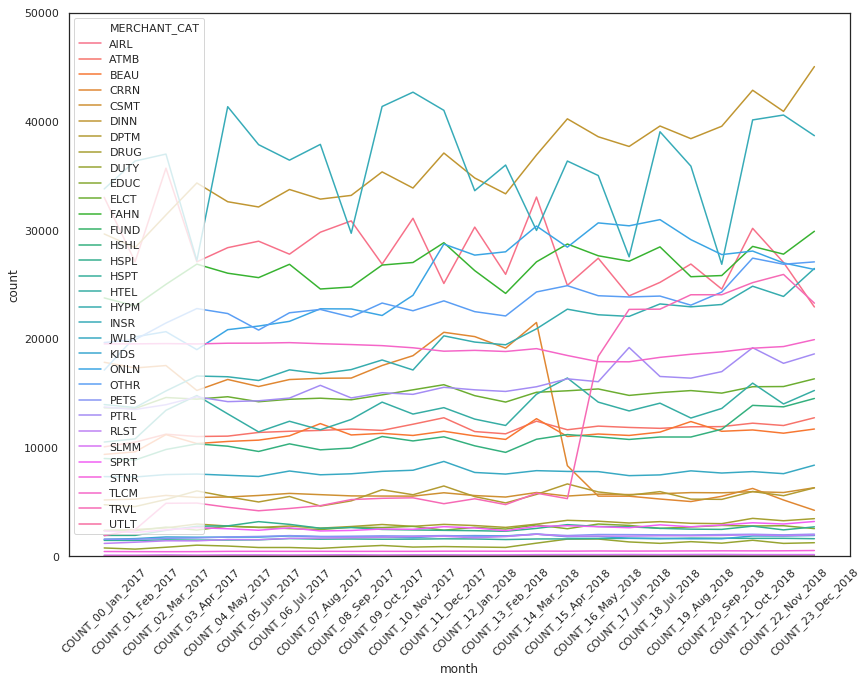

In [17]:
g = sns.lineplot(x="month", y="count", hue="MERCHANT_CAT", data=result_melt)
g.set_ylim(0,50000)
g.set_xticklabels(col_count_name, rotation=45)

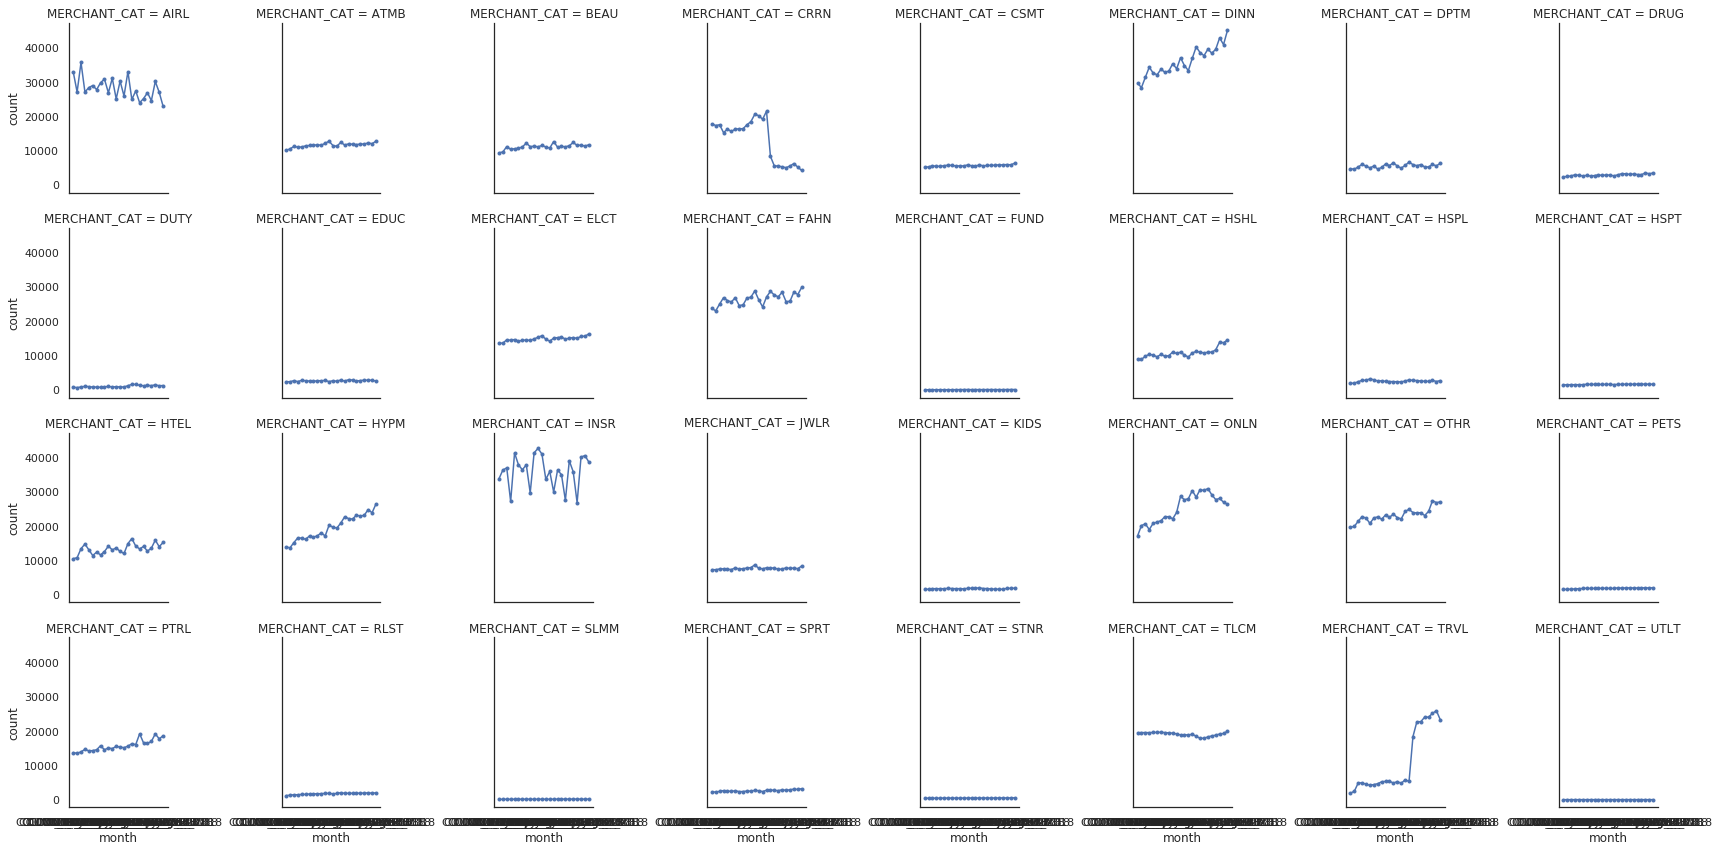

In [31]:
g = sns.FacetGrid(result_melt, col="MERCHANT_CAT", col_wrap=8)
g = g.map(plt.plot, "month", "count", marker=".")